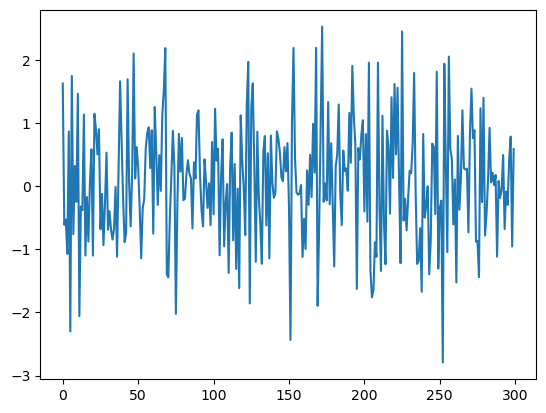

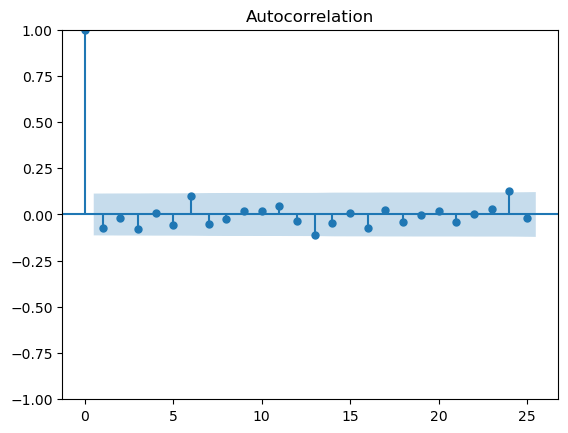

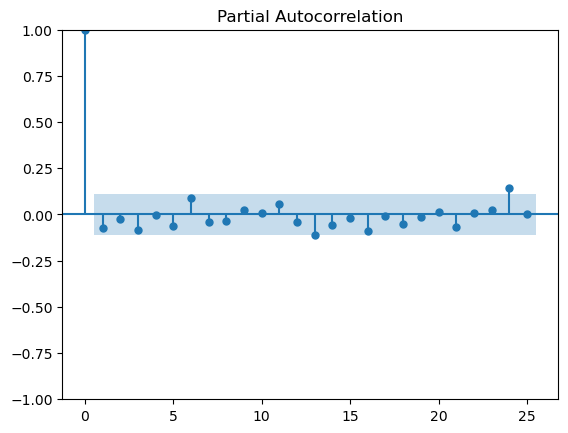

In [16]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import statsmodels.api as statmodels
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(1)
x=[]
for i in range(300): # генерируем стационарный ряд
  x.append(np.random.normal())
y = []
for i in range(300): # генерируем нестационарный ряд с квадратичным трендом
  y.append(i**2/500+np.random.normal(0,10))
x1 = pd.Series(x)
pyplot.plot(x) # графики стационарного ряда, его acf и pacf
plot_acf(x1)
plot_pacf(x1)
pyplot.show()

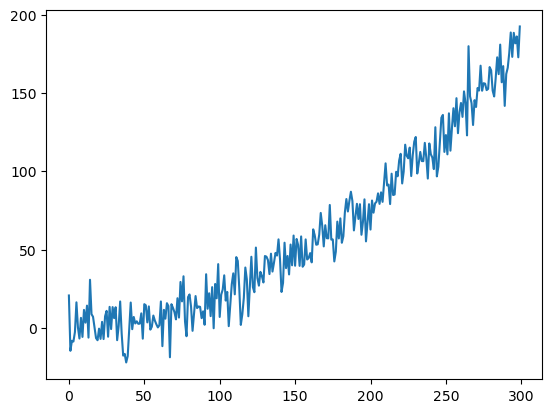

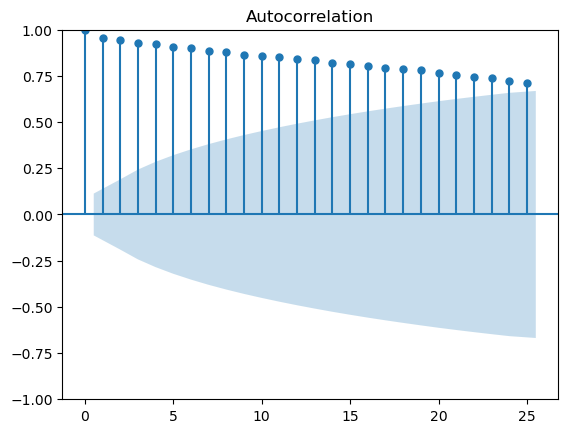

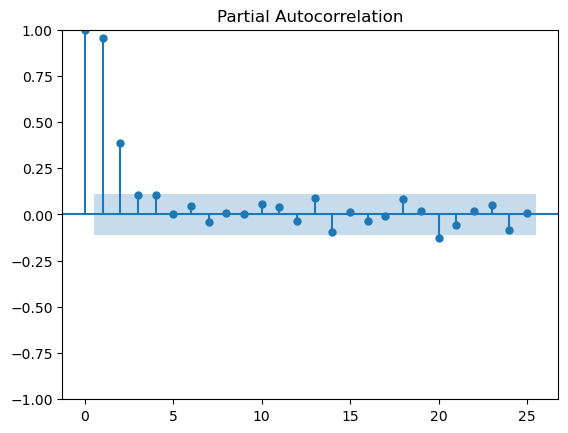

In [13]:
pyplot.plot(y) # графики нестационарного ряда, его acf и pacf
y1 = pd.Series(y)
plot_acf(y1)
plot_pacf(y1)
pyplot.show()

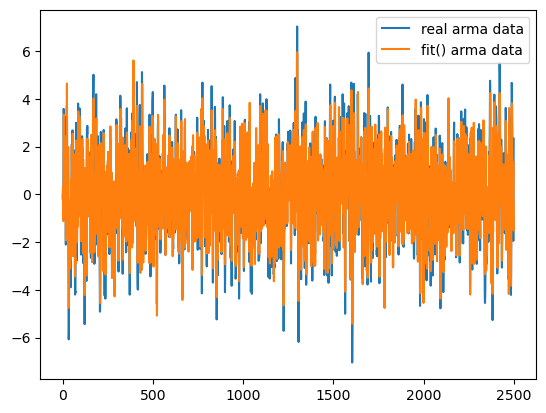

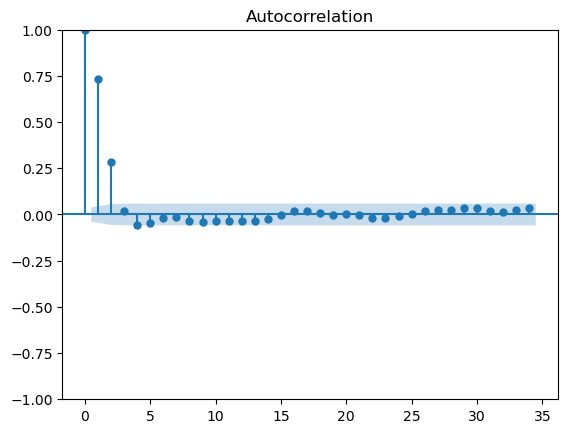

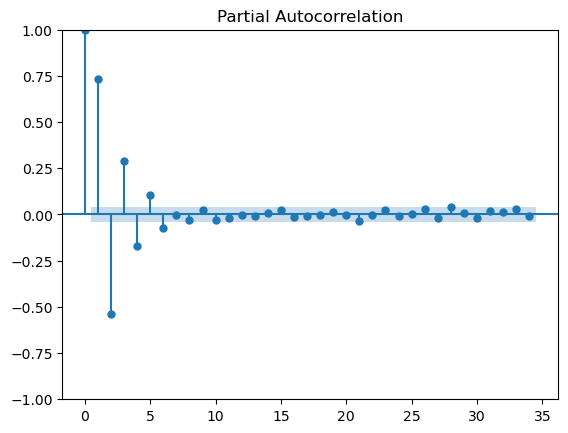

Истинные корни= [1.5+1.32287566j 1.5-1.32287566j] Корни при оценке= [1.40930429+1.32790774j 1.40930429-1.32790774j]


In [21]:
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65])
ar = np.r_[1, -arparams] # задаем коэффициенты
ma = np.r_[1, maparams]
y2 = arma_generate_sample(ar,ma,2500) # генерируем ряд arma с заданными параметрами 
model = ARIMA(y2, order=(2,0,1)).fit() # оцениваем модель arma 
pred1 = model.predict(0,2499,dynamic=False)
pyplot.plot(y2) # графики исходного ряда и ряда полученного с помощью оценок
pyplot.plot(pred1) 
pyplot.legend(['real arma data','fit() arma data'])
plot_acf(y2) # графики acf и pacf для сгенерированного ряда
plot_pacf(y2)
pyplot.show()
params = [1]
for i in range(2):
  params.append(-model.params[i+1])
print('Истинные корни=', np.roots(np.flipud(ar)), 'Корни при оценке=', np.roots(np.flipud(params))) # находим корни корни характеристических уравнений 

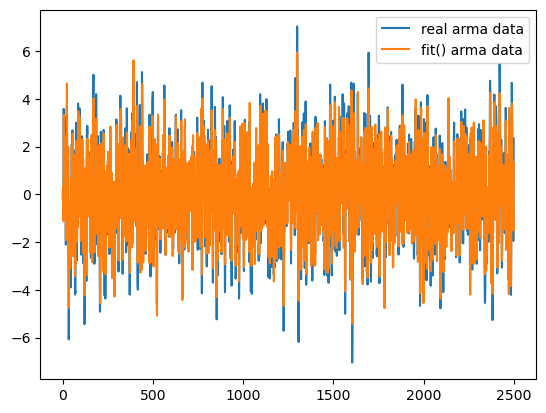

mse для 1 модели= 0.9984313008104334 ; mse для 2 модели= 0.9984013017832988
mae для 1 модели= 0.7971411740255625 ; mae для 2 модели= 0.7971293934109199


In [22]:
model2 = ARIMA(y2, order=(2,0,2)).fit() # модель с q=2
pred = model2.predict(0,2499,dynamic=False) # прогноз с помощью 2 модели 
pyplot.plot(y2) # графики исходного ряда и ряда полученного с помощью оценок
pyplot.plot(pred)
pyplot.legend(['real arma data','fit() arma data'])
pyplot.show()
print('mse для 1 модели=',mean_squared_error(y2,pred1),'; mse для 2 модели=', mean_squared_error(y2,pred)) # ошибки моделей
print('mae для 1 модели=',mean_absolute_error(y2,pred1),'; mae для 2 модели=', mean_absolute_error(y2,pred))


C:\Users\roman\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


y      mean   mean_se  mean_ci_lower  mean_ci_upper
0  2.729794  0.999928       0.769971       4.689617
1  0.820217  1.691874      -2.495796       4.136229
2 -0.108229  1.854022      -3.742046       3.525588
3 -0.295671  1.865334      -3.951659       3.360317
4 -0.188476  1.865963      -3.845697       3.468745
5 -0.057865  1.868191      -3.719451       3.603722
6  0.011630  1.869017      -3.651576       3.674837
7  0.028953  1.869098      -3.634412       3.692318
8  0.023402  1.869099      -3.639964       3.686769
9  0.014605  1.869109      -3.648781       3.677990


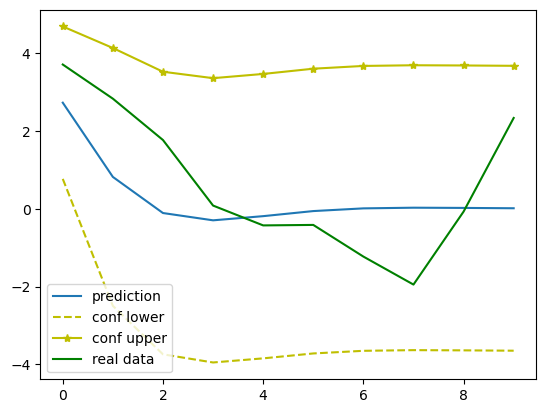

In [41]:
model3 = ARIMA(y2[0:2490], order=(2,0,1)).fit() 
results = model3.get_forecast(10, alpha=0.05).summary_frame() # прогноз на 10 значений вперед
print(results)
pyplot.plot(results['mean'])
pyplot.plot(results['mean_ci_lower'],'y--')
pyplot.plot(results['mean_ci_upper'],'y-*')
pyplot.plot(y2[2490:2500],'g')
pyplot.legend(['prediction','conf lower','conf upper','real data']) # графики прогноза, реальных значений и границ доверительного интервала 
pyplot.show()



Корни характеристического уравнения= [ 4.   -1.25]


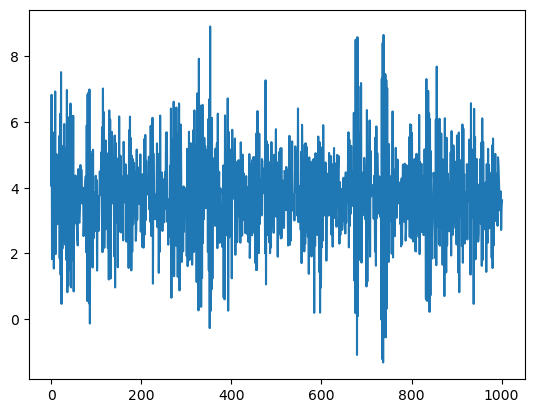

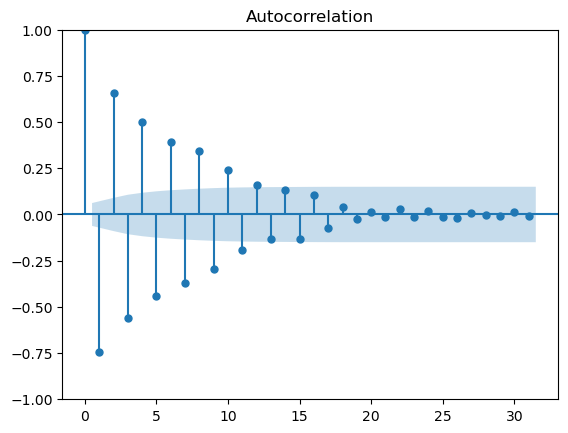

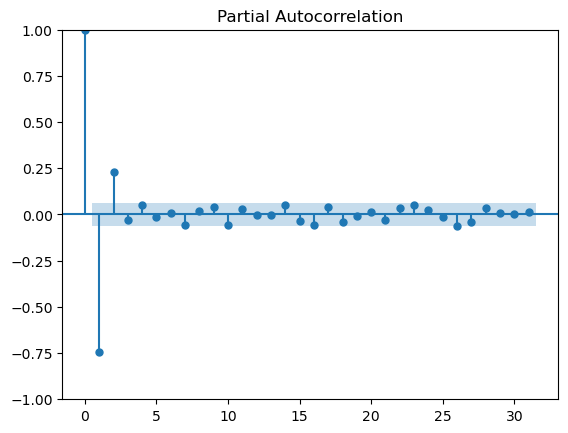

In [42]:
yt =[np.random.normal()+5, np.random.normal()+5] 
for i in range(1000): # генерация 1 ряда
  yt.append(5-0.55*yt[i+1]+0.2*yt[i]+np.random.normal())
pyplot.plot(yt) # графики ряда, acf, pacf
plot_acf(pd.Series(yt))
plot_pacf(pd.Series(yt))
print('Корни характеристического уравнения=', np.roots([-0.2,0.55,1])) # находим корни характеристического уравнения

Корни характеристического уравнения= [3.46107219 0.28892781]


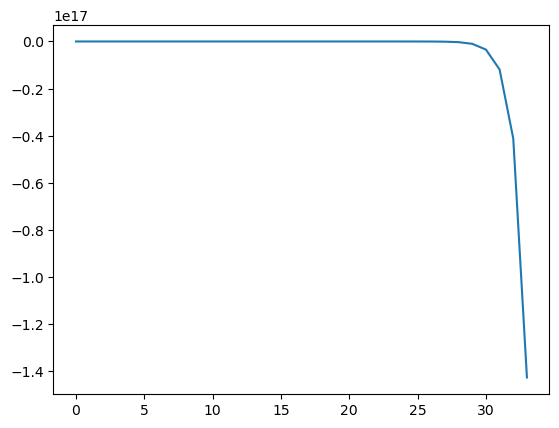

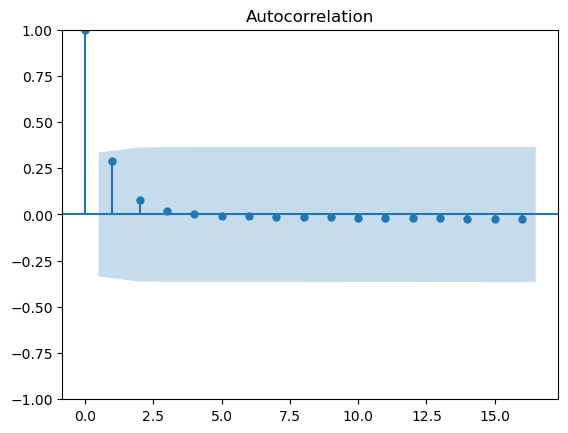

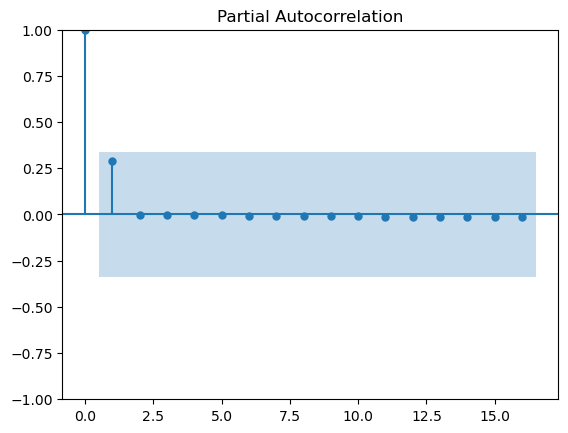

In [43]:
yt1 =[np.random.normal()+0.3, np.random.normal()+0.3]
for i in range(32): # генерация 2 ряда
  yt1.append(0.3+3.75*yt1[i+1]-yt1[i]+np.random.normal())
pyplot.plot(yt1) # графики ряда, acf, pacf
plot_acf(pd.Series(yt1))
plot_pacf(pd.Series(yt1))
print('Корни характеристического уравнения=', np.roots([1,-3.75,1])) # находим корни характеристического уравнения

Корни характеристического уравнения= [1.]


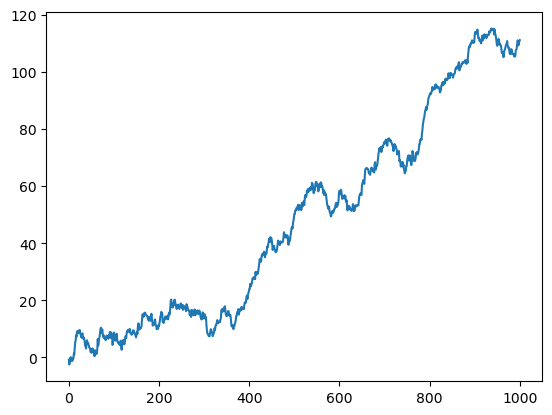

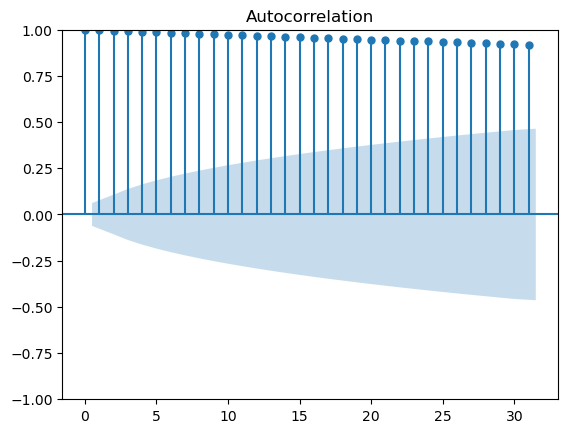

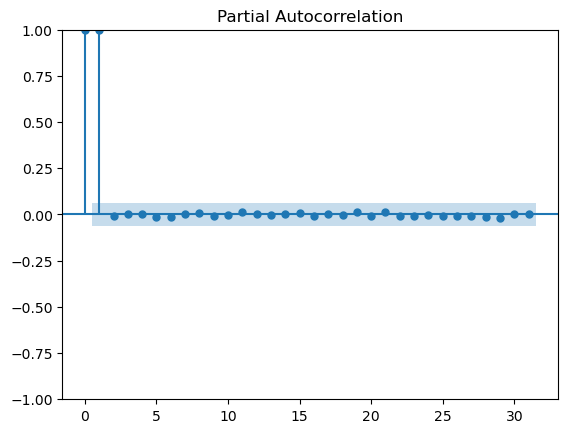

In [44]:
yt2 =[np.random.normal()+0.1]
for i in range(1000): # генерация 3 ряда
  yt2.append(0.1+yt2[i]+np.random.normal())
pyplot.plot(yt2) # графики ряда, acf, pacf
plot_acf(pd.Series(yt2))
plot_pacf(pd.Series(yt2))
print('Корни характеристического уравнения=', np.roots([-1,1])) # находим корни характеристического уравнения

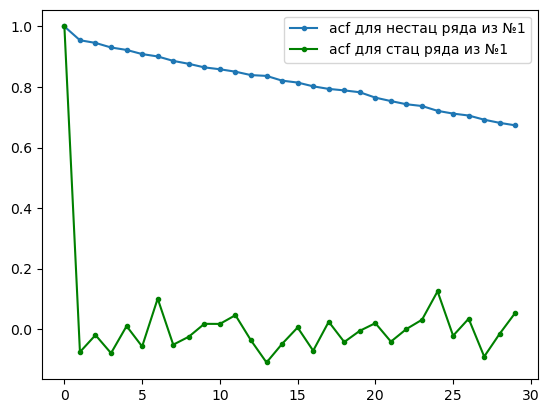

In [45]:
def acf(x): # реализация выборочной acf для проверки соответствующей функции из пакета
  lenx = len(x)
  xmean = np.mean(x)
  res = []
  denom = 0
  for t in range(lenx):
    denom += (x[t]-xmean)**2
    sum = 0
    for i in range(t,lenx):
      sum += (x[i]-xmean)*(x[i-t]-xmean)
    res.append(sum)
  return res/denom

pyplot.plot(acf(y)[0:30],'.-')
pyplot.plot(acf(x)[0:30], 'g.-')
pyplot.legend(['acf для нестац ряда из №1','acf для стац ряда из №1'])
pyplot.show()